<a href="https://colab.research.google.com/github/Daeun-Danna-Lee/DSC3032-Deep-Learning-1-Foundations-and-Image-Processing/blob/main/LDE_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1 – Polynomial Regression using ``torch.nn.Module``

- Please create a copy of this notebook onto your own Drive before working on it: `File-->Save a copy in Drive`
- Please submit your ipynb file named with your initials, e.g. `YGM-Assignment1.ipynb` with **the CODE cells output visible** to support your answers and **TEXTUAL answers given as comments** in the code cells.
- Deadline for submission is **midnight, Friday, March 18th.**

## Neural Network Model for Polynomial Regression
Your task is to build a neural network for the function $y = x^2 + 3x$

Requirements:
- You MUST use `torch.nn.Module` to define your neural network class.
- The training data should have **10 input values, $x$, and the correct corresponding output values, $y$,** for the function $y = x^2 + 3x$
- The NN may have **maximum TWO hidden layers**.
- You may use a **maximum of 500 neuron units in each hidden layer**.
- You may train over a **maximum of 1000 epochs**.
- Use suitable activation functions that have been covered in class.
- You MUST use the **Adam optimiser, `torch.optim.Adam()`** and the **MSE loss function**.
- **IMPORTANT:** Your model must have a **LOSS OF LESS THAN 0.01** at the end of training.
- **Train your model at least 3 times** to see that the final loss value is stable across all three runs.
- Print the loss at every 25th iteration.
- Test the model on $x=10$.
- **Save your training loss** at every iteration.

Note:
- If your model does not achieve a loss of less than 0.01, you will still be awarded marks for `Q7 – Q10` as long as you can explain your answers accordingly.

In [ ]:
import torch
import torch.nn as nn

In [ ]:
# 1. Define training data for a the mathematical formula y = x^2 + 3x (3)
x = torch.tensor([[1],[2],[3],[4],[5],[6],[7],[8],[9],[10]], dtype=torch.float32)
y = torch.tensor([[4],[10],[18],[28],[40],[54],[70],[88],[108],[130]], dtype=torch.float32)
# x = torch.tensor([[1],[4],[9],[16],[25],[36],[49],[64],[81],[100]], dtype=torch.float32)
# y = torch.tensor([[4],[28],[108],[304],[700],[1404],[2548],[4288],[6804],[10300]], dtype=torch.float32)

# x_li = []
# for x in range(1, 11):
#   x_li.append(x**2)
#   print(f"[{x**2}],", end="")

# print()

# for x in x_li:
#   y = x**2 + 3*x
#   print("[{}],".format(y), end="")

In [ ]:
# 2. Define NN class (10)
class MyModel(nn.Module):
    
    def __init__(self, hidden_size):
        super().__init__()
        self.linear1 = nn.Linear(1, hidden_size)
        self.activation = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, 1) 
    
    def forward(self, x):
        x = self.linear1(x)
        x = self.activation(x)
        x = self.linear2(x)
        return x

In [ ]:
# 3. Create an instance of NN model (2)
hidden_size = 400
model = MyModel(hidden_size)

In [ ]:
# 4. Loss and Optimiser (2)
learning_rate = 0.1
loss_fn = nn.MSELoss()
opt = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
# 5. Training loop
num_epochs = 1000
saved_loss = []

for epoch in range(num_epochs):
  # 5.1 Forward pass (2)
  y_pred = model(x)
  loss = loss_fn(y_pred, y) 

  # 5.2 Backward pass (3)
  opt.zero_grad() 
  loss.backward()
  opt.step()

  # 5.3 Print loss every 25th epoch (1)
  if (epoch+1) % 25 == 0:
    print(f'Epoch {epoch+1}/{num_epochs}, Loss={loss.item():.4f} ')

  # 5.4 Save training loss at every epoch (2)
  saved_loss.append(loss.item())

# Ensure that loss is less than 0.01 at the end if training consistently (3)


Epoch 25/1000, Loss=53.4011 
Epoch 50/1000, Loss=24.4947 
Epoch 75/1000, Loss=10.4219 
Epoch 100/1000, Loss=4.8078 
Epoch 125/1000, Loss=2.4435 
Epoch 150/1000, Loss=1.4424 
Epoch 175/1000, Loss=0.8846 
Epoch 200/1000, Loss=0.6024 
Epoch 225/1000, Loss=0.4509 
Epoch 250/1000, Loss=0.3385 
Epoch 275/1000, Loss=0.2544 
Epoch 300/1000, Loss=0.1950 
Epoch 325/1000, Loss=0.1543 
Epoch 350/1000, Loss=0.1271 
Epoch 375/1000, Loss=0.1093 
Epoch 400/1000, Loss=0.0977 
Epoch 425/1000, Loss=0.0885 
Epoch 450/1000, Loss=0.0799 
Epoch 475/1000, Loss=0.0719 
Epoch 500/1000, Loss=0.0644 
Epoch 525/1000, Loss=0.0575 
Epoch 550/1000, Loss=0.0512 
Epoch 575/1000, Loss=0.0454 
Epoch 600/1000, Loss=0.0401 
Epoch 625/1000, Loss=0.0353 
Epoch 650/1000, Loss=0.0310 
Epoch 675/1000, Loss=0.0271 
Epoch 700/1000, Loss=0.0236 
Epoch 725/1000, Loss=0.0205 
Epoch 750/1000, Loss=0.0177 
Epoch 775/1000, Loss=0.0153 
Epoch 800/1000, Loss=0.0132 
Epoch 825/1000, Loss=0.0113 
Epoch 850/1000, Loss=0.0096 
Epoch 875/1000

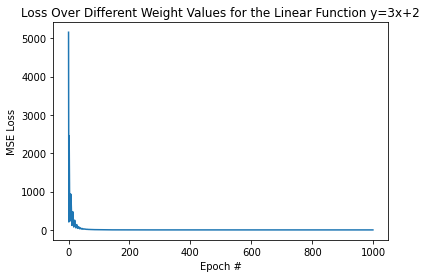

In [ ]:
# 6. Visualize (3)
# Plot the landscape of your training loss (MSE loss) saved for every epoch.
# y-axis would mean MSE loss and x-axis would mean the epoch of your training.
# Hint: you should plot (1,first MSE loss), ... ,(last epoch number,last MSE loss)
import numpy as np
import matplotlib.pyplot as plt

# Plot the graph
plt.title("Loss Over Different Weight Values for the Linear Function y=3x+2")
plt.plot([i for i in range(num_epochs)], saved_loss)
plt.xlabel('Epoch #')
plt.ylabel('MSE Loss')
plt.show()

In [ ]:
# 7. Prediction (2)
# Let's use the model on a new number x, defined as a tensor
test_num = 10
test = torch.tensor([test_num], dtype=torch.float32)

# Get the model's prediction for this new x
print(f'\n\nModel prediction for {test_num} is {model(test).item():.4f}')



Model prediction for 10 is 129.9093


In [ ]:
# Make sure the output of your code cells support your answers below:

# Q8. Describe how the loss changed over time during training. (2)
# A8. It genuinely decreased, rarely fluctuated.

# Q9. Is the prediction for x=10 close enough to the ideal value of 130? 
# Why do you think the prediction is or isn't close enough to the ideal value? (2)
# A9. Yes, for x=10, since 10 is close to the range of input values.

# Q10. What are the predictions for x=20 and x=100? Based on these predictions, 
# comment on whether the model has captured the relationship between the training inputs and outputs. (2)
for test_num in [20, 100]:
  test = torch.tensor([test_num], dtype=torch.float32)
  print(f'\n\nModel prediction for {test_num} is {model(test).item():.4f} (Real Value: {test_num**2 + 3*test_num}, loss: {test_num**2 + 3*test_num - model(test).item():.4f})')
# A10. Not really. The loss is too big. I think 20 and 100 is far apart from input values, so it was hard for model to predict the right value.
# So I tried to enlarge the gap between input values(from 1 to 100), then the prediction for 20, 100 got much better. (on More Tests)

# Q11. Apart from tweaking the number of epochs and the number of neuron units in the hidden layer, think
# of AT LEAST ONE more thing you would do to try to improve the model. You do NOT have to follow the 
# requirements nor to implement anything. (1)
# A11. I might be able to try to change the learning rate, structure of layers, number of inputs, and a type of activation function.




Model prediction for 20 is 348.0074 (Real Value: 460, loss: 111.9926)


Model prediction for 100 is 2092.7356 (Real Value: 10300, loss: 8207.2644)


## More Tests

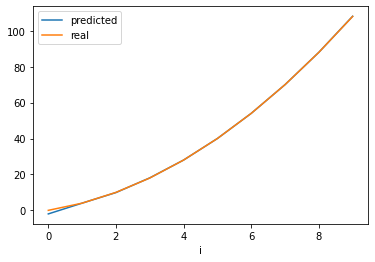

In [ ]:
# desired vs. predicted (until 10)
max_num = 10
plt.plot([i for i in range(max_num)], [model(torch.tensor([i], dtype=torch.float32)).item() for i in range(max_num)], label="predicted")
plt.plot([i for i in range(max_num)], [i**2 + i*3 for i in range(max_num)], label="real")
plt.xlabel('i')
plt.legend()
plt.show()

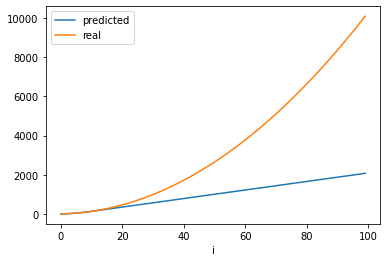

In [ ]:
# desired vs. predicted (until 100)
max_num = 100
plt.plot([i for i in range(max_num)], [model(torch.tensor([i], dtype=torch.float32)).item() for i in range(max_num)], label="predicted")
plt.plot([i for i in range(max_num)], [i**2 + i*3 for i in range(max_num)], label="real")
plt.xlabel('i')
plt.legend()
plt.show()

The model was trained with limitied input values, between 1-10, so we can see that it cannot cover larger values then that.

So I tried to test different input values which are between 1 to 100.

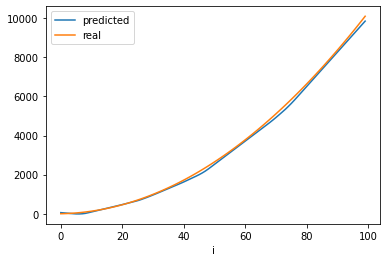

In [ ]:
# input values changed to 1 to 100
x = torch.tensor([[1],[4],[9],[16],[25],[36],[49],[64],[81],[100]], dtype=torch.float32)
y = torch.tensor([[4],[28],[108],[304],[700],[1404],[2548],[4288],[6804],[10300]], dtype=torch.float32)

hidden_size = 400
model = MyModel(hidden_size)

learning_rate = 0.1
loss_fn = nn.MSELoss()
opt = torch.optim.Adam(model.parameters(), lr=learning_rate)

num_epochs = 1000
saved_loss = []

for epoch in range(num_epochs):
  y_pred = model(x)
  loss = loss_fn(y_pred, y) 

  opt.zero_grad() 
  loss.backward()
  opt.step()

max_num = 100
plt.plot([i for i in range(max_num)], [model(torch.tensor([i], dtype=torch.float32)).item() for i in range(max_num)], label="predicted")
plt.plot([i for i in range(max_num)], [i**2 + i*3 for i in range(max_num)], label="real")
plt.xlabel('i')
plt.legend()
plt.show()

The graph looks much better, but the prediction on x=10 is now less accurate.

In [ ]:
for test_num in [10, 20, 100]:
  test = torch.tensor([test_num], dtype=torch.float32)
  print(f'\n\nModel prediction for {test_num} is {model(test).item():.4f} (Real Value: {test_num**2 + 3*test_num}, loss: {test_num**2 + 3*test_num - model(test).item():.4f})')



Model prediction for 10 is 90.9728 (Real Value: 130, loss: 39.0272)


Model prediction for 20 is 467.6303 (Real Value: 460, loss: -7.6303)


Model prediction for 100 is 10024.5117 (Real Value: 10300, loss: 275.4883)
